In [63]:
import pandas as pd
import networkx as nx
import numpy as np
import time
import tweepy
import json

In [3]:
raw_tweets_df = pd.read_csv('data/WorldCup/tweets.csv')
raw_users_df = pd.read_csv('data/WorldCup/users.csv')

In [4]:
no_dups_tweets = raw_tweets_df.drop_duplicates(subset=['id'])
no_dups_users = raw_users_df.drop_duplicates(subset=['id'])

In [22]:
tweets_number_by_author = no_dups_tweets['author_id'].value_counts()

In [29]:
author_ids = pd.unique(no_dups_tweets['author_id'])
author_ids.shape

(41638,)

In [6]:
no_dups_users

,id,username,created_at,followers_count,following_count,tweet_count,protected,verified
0,3254197047,PalloneBucato,2015-05-14 16:48:40+00:00,558,610,23651,False,False
1,1441282471400673280,BNsportsGr,2021-09-24 06:05:17+00:00,1260,142,19825,False,False
2,1591065849531604994,mistresslily85,2022-11-11 13:50:48+00:00,0,5,7,False,False
3,2901835883,lacasacatv,2014-12-02 04:01:41+00:00,1991,445,7163,False,False
4,1456620452261072896,XavBarretFoot,2021-11-05 13:54:59+00:00,631,205,624,False,False
...,...,...,...,...,...,...,...,...
205688,1008955982549012480,AlbertGallard00,2018-06-19 06:13:46+00:00,110,1393,1937,False,False
205689,904112236108623872,laotian90,2017-09-02 22:42:09+00:00,364,391,59037,False,False
205690,1142548358747361280,v2s400,2019-06-22 21:42:11+00:00,31,245,1300,False,False
205691,138994780,JoaquinGPeralta,2010-05-01 06:49:10+00:00,207,148,9180,False,False


In [39]:
min_number_of_tweets = 5

active_users = []

for author_id in author_ids:
    if tweets_number_by_author[author_id] > min_number_of_tweets:
        active_users.append(author_id)

active_users = np.array(active_users)

In [40]:
active_users.shape

(2076,)

In [43]:
min_followers_count = 5

proper_users = []

for i, row in no_dups_users.iterrows():
    if row['id'] in active_users:
        # checking followers count to drop BOTs
        if row['followers_count'] > min_followers_count:        
            proper_users.append(row)

In [44]:
proper_users_df = pd.DataFrame(proper_users)
proper_users_df

,id,username,created_at,followers_count,following_count,tweet_count,protected,verified
0,3254197047,PalloneBucato,2015-05-14 16:48:40+00:00,558,610,23651,False,False
1,1441282471400673280,BNsportsGr,2021-09-24 06:05:17+00:00,1260,142,19825,False,False
15,138372303,FIFAWorldCup,2010-04-29 10:58:07+00:00,10058244,589,29572,False,True
27,1015663363622408196,Xavo_593,2018-07-07 18:26:30+00:00,96,71,6551,False,False
36,1580995529248571408,ElBotDelMundial,2022-10-14 18:54:53+00:00,612,2,239,False,False
...,...,...,...,...,...,...,...,...
203128,1308837802013057026,realtinywhale,2020-09-23 18:37:26+00:00,1540,3930,5831,False,False
203214,14248214,aliman17,2008-03-29 00:33:22+00:00,45,416,3711,False,False
203960,1265865310420250624,TOPSportscl,2020-05-28 04:40:01+00:00,7775,99,7377,False,False
205084,2575499095,DanielMarsenux,2014-06-18 20:55:42+00:00,1086,5006,12575,False,False


In [45]:
proper_users_df.sort_values(by='followers_count')

,id,username,created_at,followers_count,following_count,tweet_count,protected,verified
513,1579781424567136256,XtratimeB,2022-10-11 10:30:57+00:00,6,5,145,False,False
122893,1589832213054504961,_BrasilnaCopa2,2022-11-08 04:12:30+00:00,6,43,67,False,False
99977,2590264154,Eng_iQl,2014-06-26 21:02:46+00:00,6,70,85,False,False
159043,1326951851254755330,msr4official,2020-11-12 18:15:56+00:00,6,31,129,False,False
129525,1563577164930613252,newsplayerslive,2022-08-27 17:20:43+00:00,6,7,460,False,False
...,...,...,...,...,...,...,...,...
118443,18079284,RevistaSemana,2008-12-12 16:25:25+00:00,5199989,42,532961,False,True
9091,15095537,marca,2008-06-12 11:05:13+00:00,6350971,1637,517640,False,True
878,576241232,beINSPORTS,2012-05-10 13:38:53+00:00,8085126,181,135263,False,True
11269,216289357,skynewsarabia,2010-11-16 08:40:50+00:00,8322114,4,363722,False,True


In [18]:
proper_users_df.describe()

,id,followers_count,following_count,tweet_count
count,3.776800e+04,3.776800e+04,37768.000000,3.776800e+04
mean,6.977257e+17,2.798040e+04,1304.742163,2.563250e+04
std,6.685946e+17,3.714595e+05,7241.808083,7.984743e+04
min,5.770000e+02,6.000000e+00,0.000000,1.000000e+00
25%,4.428004e+08,8.500000e+01,138.000000,9.140000e+02
50%,8.359623e+17,3.880000e+02,435.000000,4.923000e+03
75%,1.380753e+18,1.709250e+03,1176.000000,2.024100e+04
max,1.596445e+18,3.739520e+07,652002.000000,6.360747e+06


In [49]:
with open("credentials.json") as f:
    credentials = json.load(f)
    
client = tweepy.Client(bearer_token=credentials['BEARER_TOKEN'])

In [87]:
G = nx.DiGraph()

In [88]:
for user_id in proper_users_df['id']:
    try:
        for users in tweepy.Paginator(client.get_users_followers, user_id, max_results=1000, limit=200):
            if users.data is not None:
                for user in users.data:
                    # checking if the user is in our set (we aren't intersted in useres that aren't in the)
                    if user.id in proper_users_df['id'].values:
                        G.add_edge(user.id, user_id)
                    
    except tweepy.TooManyRequests:
        print('WARNING: Tweet download stopped due to TooManyRequest exception. Waiting 15 minutes...')
        time.sleep(15 * 60)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'Istniejące połączenie zostało gwałtownie zamknięte przez zdalnego hosta', None, 10054, None))

In [89]:
G.size()

200

In [143]:
import pickle

with open('followers_graph.pkl', 'wb') as f:
    pickle.dump(G, f)

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities, modularity

In [78]:
G.size()

125

In [79]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 887670958328336385, 3254197047, 1249326056693288962, 1349089800800890882, 1506248611411251209, 1502314843625435138, 1016724631074557953, 241080365, 1554519474438492162, 3598705636, 1020088309349957638, 1098228509594406912, 3235494176, 2769478040, 957562542, 7996522, 1447603056359714817, 1055130038092345344, 1473778871065464832, 1447604020462370822, 4496179816, 524531680, 1471096825415274496, 877857931349311492, 824953105666174976, 1572599292254162954, 1506315986383032321, 1590106079769362434, 2590264154, 894092432836620288, 1580322511488622594, 1571136292347584512))

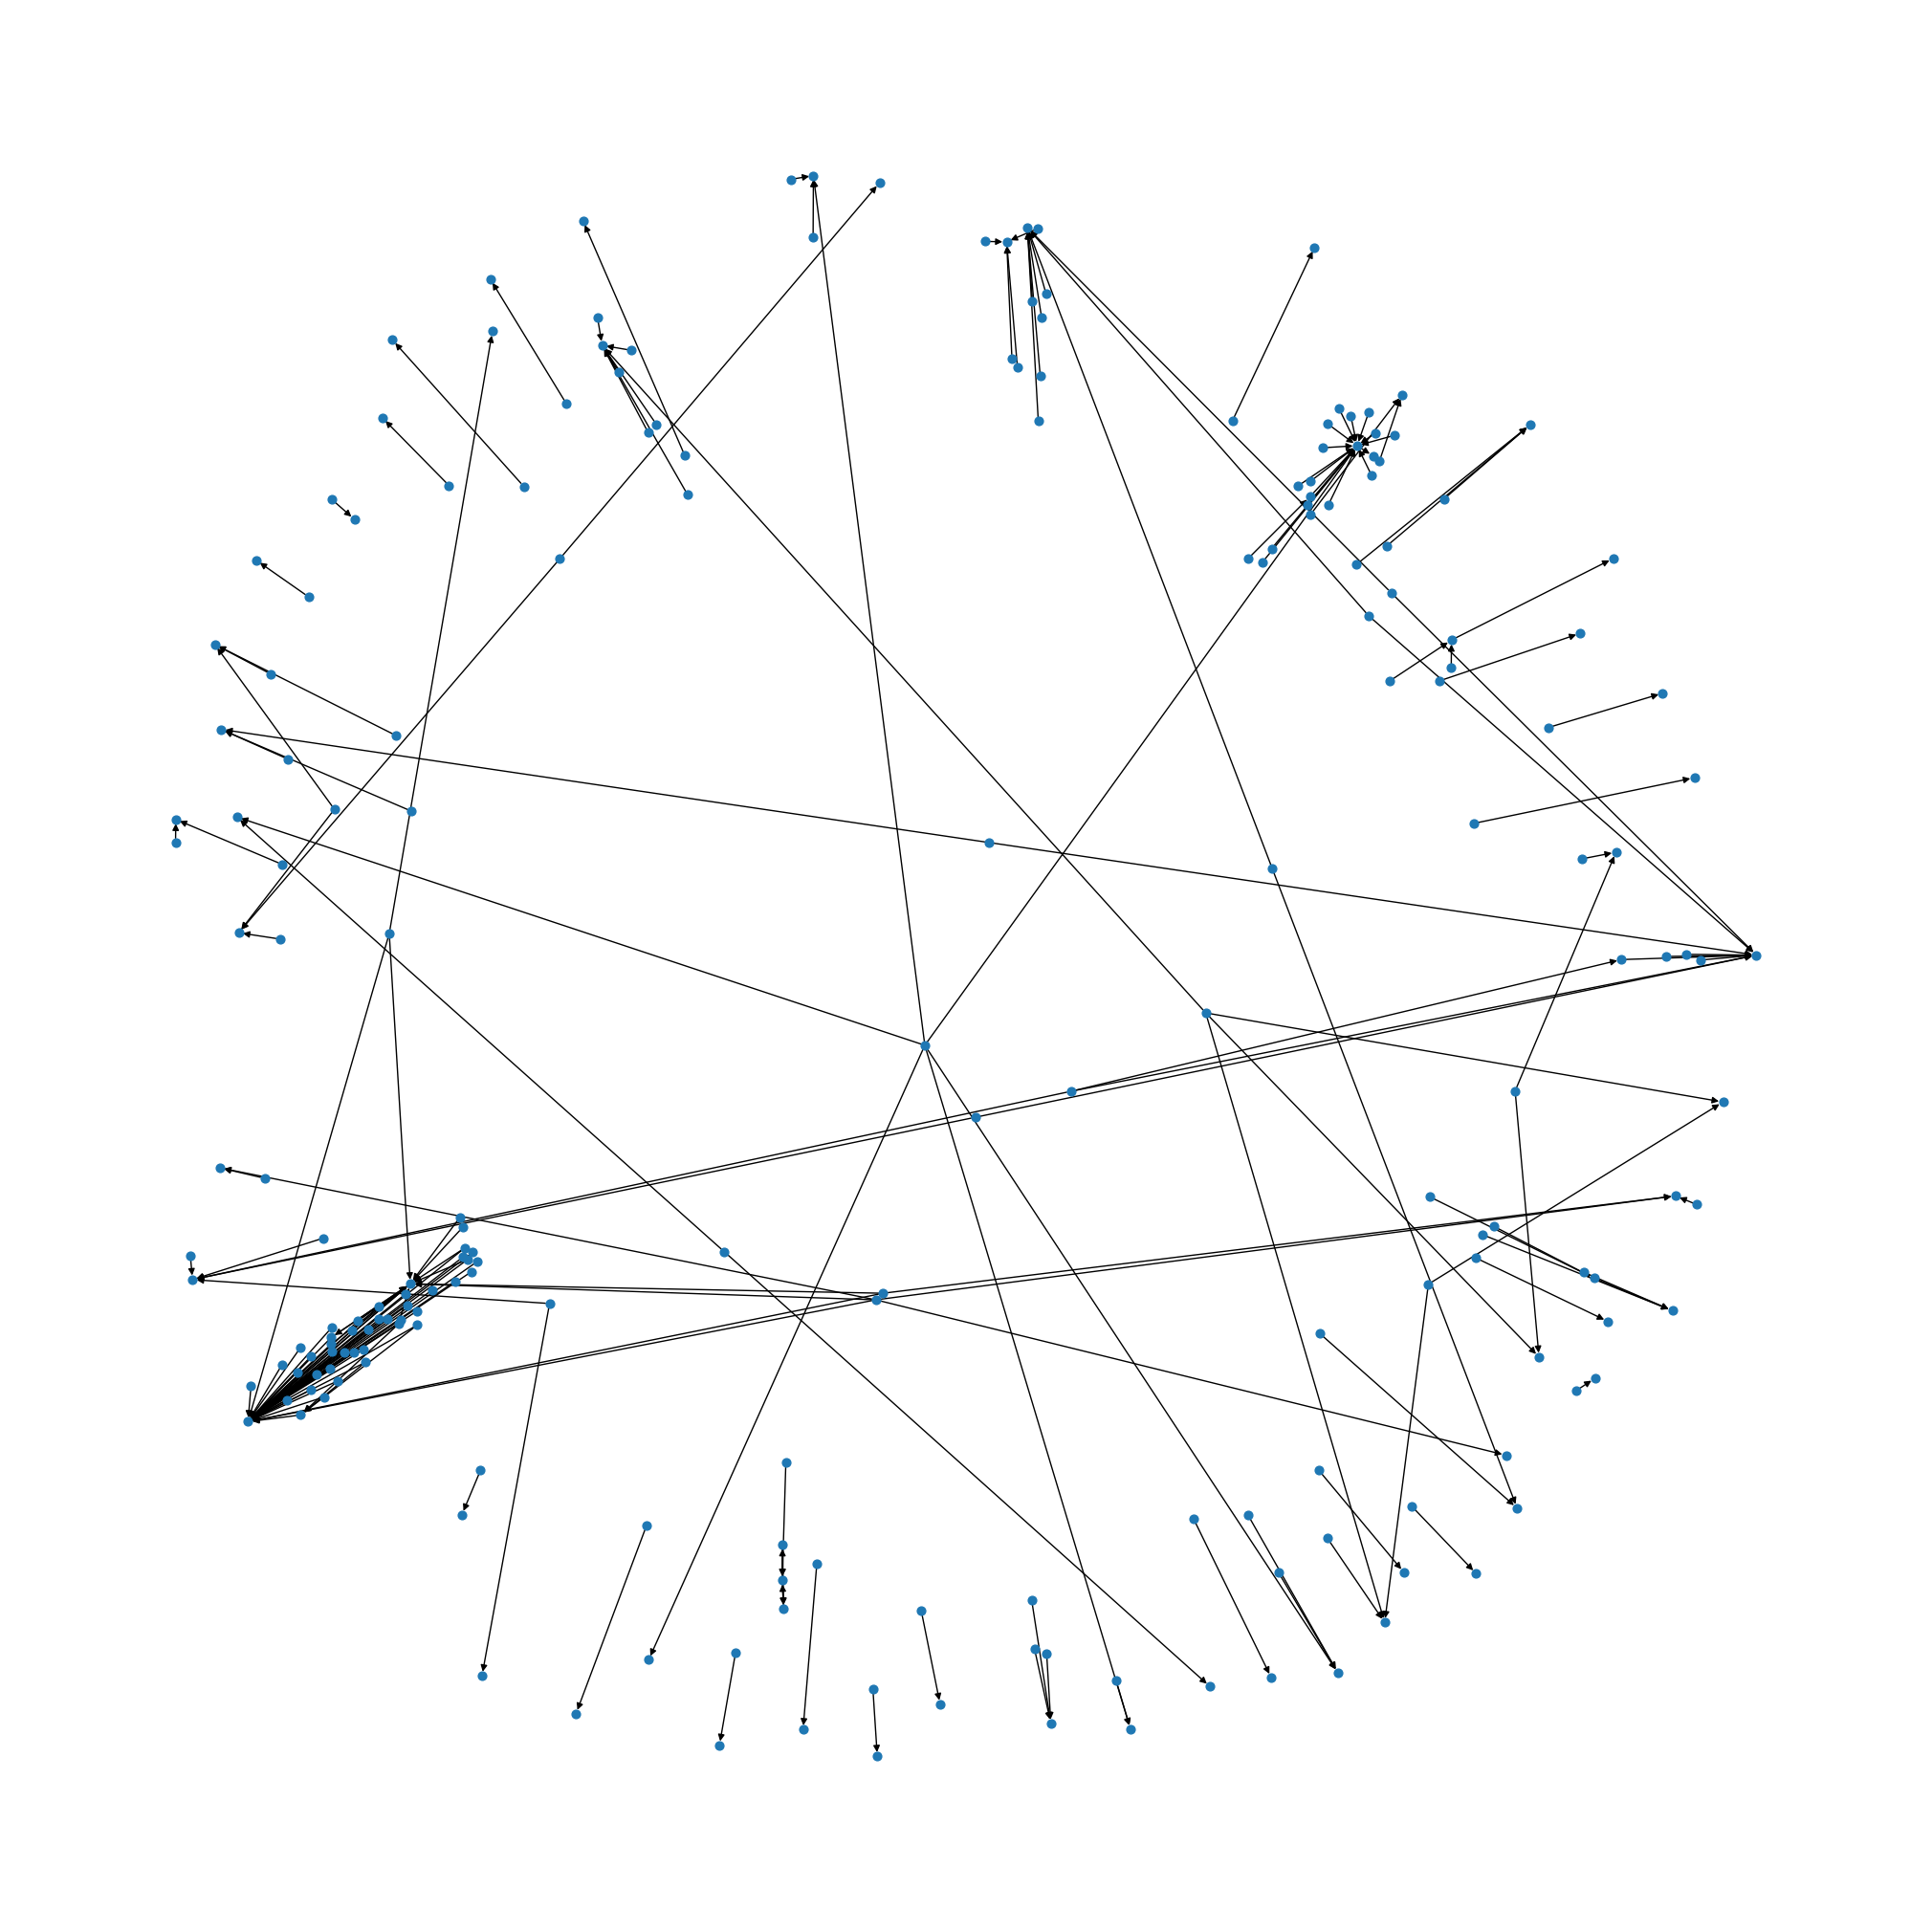

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
nx.draw_spring(G, node_size=40, with_labels=False, cmap='hsv')
plt.show()

In [135]:
list(color_list.values())

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.05555555555555555,
 0.055555

In [114]:
c = greedy_modularity_communities(G)

In [96]:
modularity(G, c)

0.837774999999999

In [132]:
len(G.nodes())

210

In [115]:
c

[frozenset({142294425,
            166492200,
            172757932,
            209963662,
            536262371,
            997144136,
            1572728546,
            2266675676,
            2379223818,
            2472455929,
            2826080966,
            3109806805,
            779652781397291009,
            861225372918185984,
            912658119980806144,
            971403215919988736,
            980782925128937474,
            1024005457378197505,
            1043489009110999045,
            1113366826208059392,
            1117308594880425987,
            1148767641433247744,
            1170598287998504960,
            1177448589468942336,
            1185871146136133632,
            1225303495542095872,
            1240898857388535808,
            1261151346591281152,
            1280369024027648001,
            1284152492666654720,
            1293076830979727362,
            1300146175249539073,
            1338410909660635136,
            134493371440558080

In [125]:
color_list = {}

color = 0.0
for community in c:
    for node in community:
        color_list[node] = color
    color += 1/len(c)
    

In [126]:
len(color_list)

210

In [130]:
color_list.keys()

210

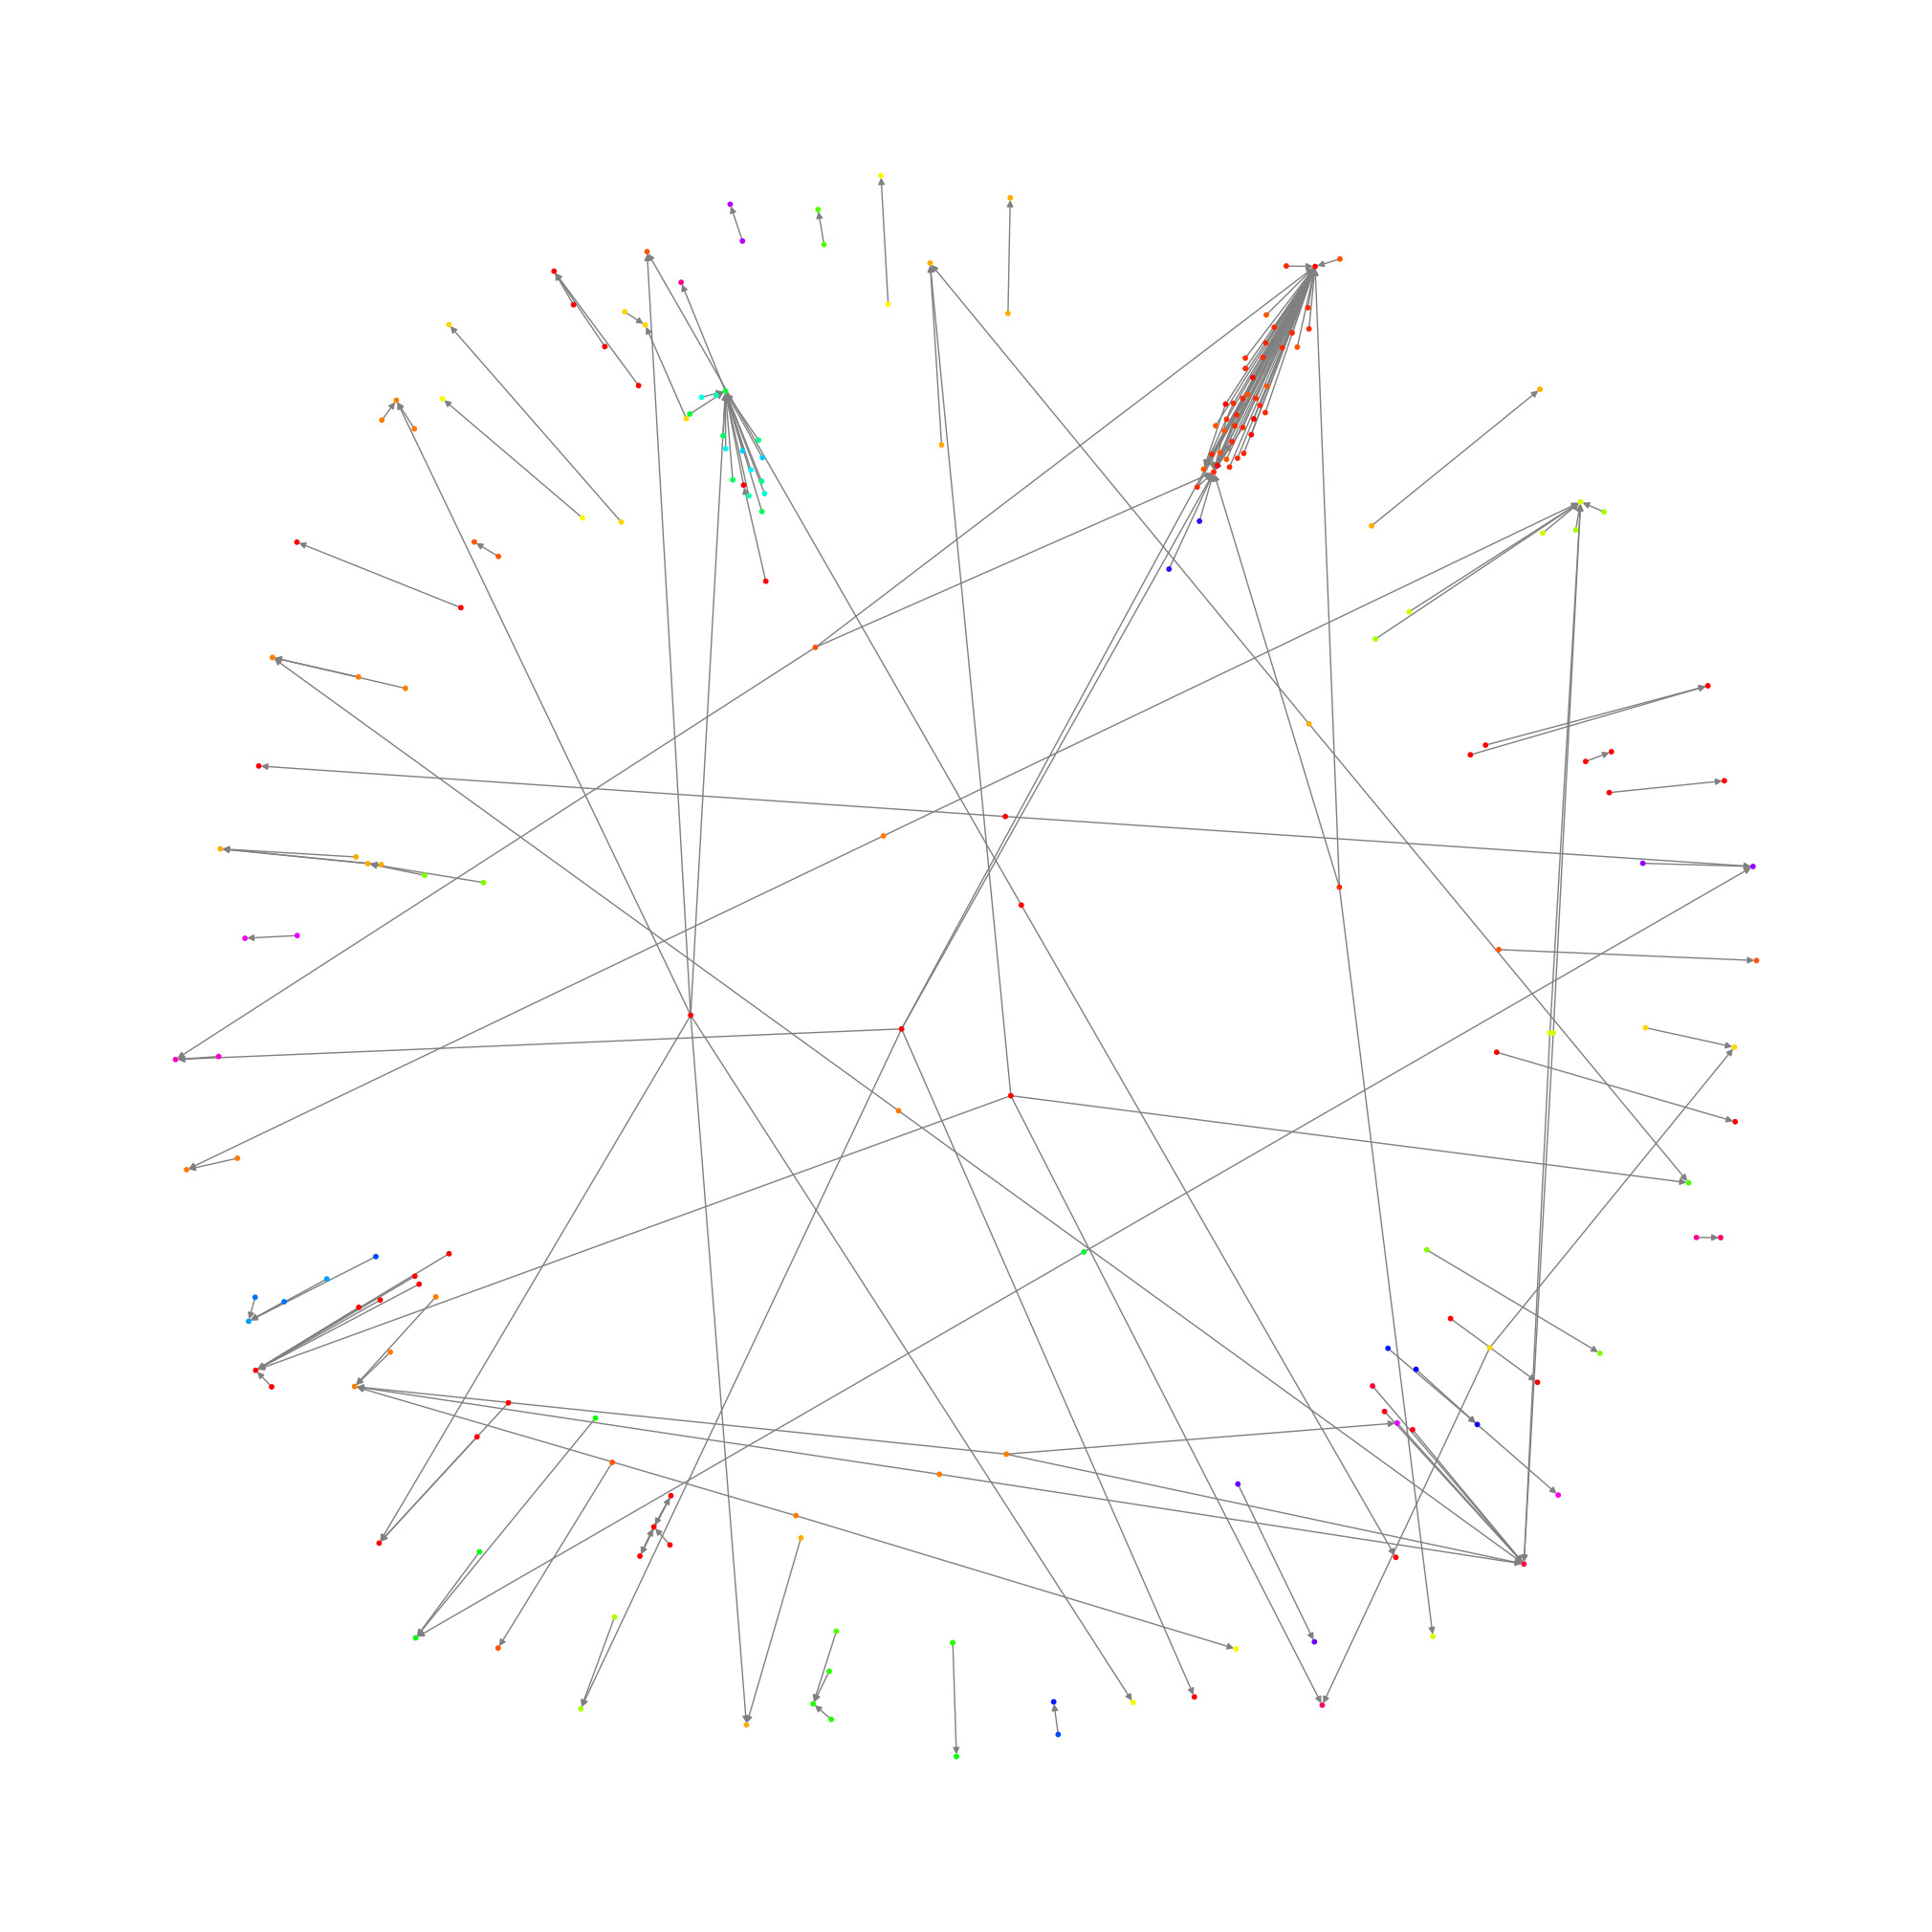

In [144]:
plt.figure(figsize=(20,20))
nx.draw(G, pos=nx.spring_layout(G), node_size=10, node_color=list(color_list.values()), cmap='hsv', edge_color='gray')